# Starter Code

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns
%matplotlib inline

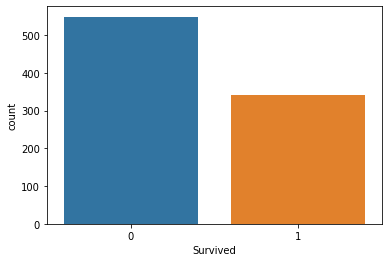

In [5]:
sns.countplot(x='Survived',data=data)


In [6]:
data['Cabin_class'] = data['Cabin'].str.get(0)

In [7]:
data.loc[data['Cabin_class'].isna()==True,'Cabin_class']='Sem classificacao'

In [8]:
df = pd.get_dummies(data['Cabin_class'])

In [9]:
data = pd.concat([data, df], axis=1)

In [10]:
df = pd.get_dummies(data['Pclass'],prefix='Class')

In [11]:
data = pd.concat([data, df], axis=1)

In [12]:
df = pd.get_dummies(data['Sex'])

In [13]:
data = pd.concat([data, df], axis=1)

In [14]:
df = pd.get_dummies(data['Parch'],prefix='Parch')

In [15]:
data = pd.concat([data, df], axis=1)

In [16]:
df = pd.get_dummies(data['Embarked'],prefix='Embarked')

In [17]:
data = pd.concat([data, df], axis=1)

In [18]:
df = pd.get_dummies(data['SibSp'],prefix='SibSp')

In [19]:
data = pd.concat([data, df], axis=1)

In [20]:
data.groupby(['SibSp']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
SibSp,,,,,,,,,,,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,...,608,608,608,608,608,608,608,608,608,608
1,209,209,209,209,209,183,209,209,209,69,...,209,209,209,209,209,209,209,209,209,209
2,28,28,28,28,28,25,28,28,28,6,...,28,28,28,28,28,28,28,28,28,28
3,16,16,16,16,16,12,16,16,16,3,...,16,16,16,16,16,16,16,16,16,16
4,18,18,18,18,18,18,18,18,18,0,...,18,18,18,18,18,18,18,18,18,18
5,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
8,7,7,7,7,7,0,7,7,7,0,...,7,7,7,7,7,7,7,7,7,7


In [21]:
data['Survived_'] = data['Survived']

In [22]:
df = data.drop(['PassengerId','Name','Sex','Parch','Ticket','SibSp','Embarked','Cabin_class','Cabin','Survived','Sem classificacao'],axis=1)

In [23]:
df.dropna(axis='columns',inplace=True)

In [24]:
df.dropna(axis='rows',inplace=True)

In [54]:
X = df.drop('Survived_',axis=1).values
y = df['Survived_'].values

In [70]:
df.columns

Index(['Pclass', 'Fare', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Class_1',
       'Class_2', 'Class_3', 'female', 'male', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Survived_'],
      dtype='object')

In [91]:
df.columns

Index(['Pclass', 'Fare', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Class_1',
       'Class_2', 'Class_3', 'female', 'male', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Survived_'],
      dtype='object')

In [73]:
x_test_df = pd.DataFrame(X_test)

In [117]:
x_test_df.loc[x_test_df[14]==1,'predictions_2']=0
x_test_df.loc[x_test_df[14]==0,'predictions_2']=1
predictions2 = x_test_df['predictions_2']
predictions2

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
218    0.0
219    1.0
220    1.0
221    0.0
222    0.0
Name: predictions_2, Length: 223, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

In [32]:
X_test = scaler.transform(X_test)

In [61]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.055628,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.444099,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.024350,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
219,1.0,0.014110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
220,1.0,0.015127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.5,0.076123,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [38]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/50
21/21 [==============================] - 0s 23ms/step - loss: 0.6038 - val_loss: 0.5860
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5525 - val_loss: 0.5462
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5090 - val_loss: 0.5256
Epoch 4/50
21/21 [==============================] - 0s 11ms/step - loss: 0.4910 - val_loss: 0.5041
Epoch 5/50
21/21 [==============================] - 0s 12ms/step - loss: 0.4744 - val_loss: 0.5122
Epoch 6/50
21/21 [==============================] - ETA: 0s - loss: 0.478 - 0s 11ms/step - loss: 0.4721 - val_loss: 0.4958
Epoch 7/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4409 - val_loss: 0.4893
Epoch 8/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4438 - val_loss: 0.4844
Epoch 9/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4314 - val_loss: 0.4935
Epoch 10/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4173 - val_los

In [39]:
model_loss = pd.DataFrame(model.history.history)

In [40]:
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

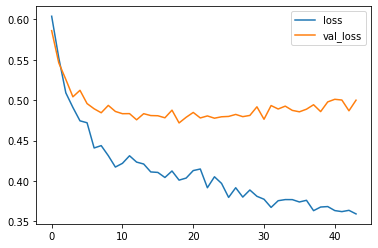

In [42]:
model_loss.plot()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       127
           1       0.83      0.59      0.69        96

    accuracy                           0.77       223
   macro avg       0.79      0.75      0.75       223
weighted avg       0.78      0.77      0.76       223



In [49]:
confusion_matrix(y_test,predictions)

array([[115,  12],
       [ 39,  57]], dtype=int64)

In [119]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       127
           1       0.77      0.64      0.70        96

    accuracy                           0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [120]:
confusion_matrix(y_test,predictions2)

array([[109,  18],
       [ 35,  61]], dtype=int64)